DATA_DIR auto-detected: c:\Users\user\Documents\Project\batik_vision_project\Batik-Indonesia
Memindai folder data di: c:\Users\user\Documents\Project\batik_vision_project\Batik-Indonesia
Selesai. Ditemukan total 2599 file dalam 38 kelas.

--- Statistik Distribusi Kelas ---
            count
count   38.000000
mean    68.394737
std     46.551651
min     22.000000
25%     43.250000
50%     50.000000
75%     80.000000
max    230.000000

Membuat plot distribusi kelas...


C:\Users\user\AppData\Local\Temp\ipykernel_20344\3633848228.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['count'], y=df.index, palette='viridis')


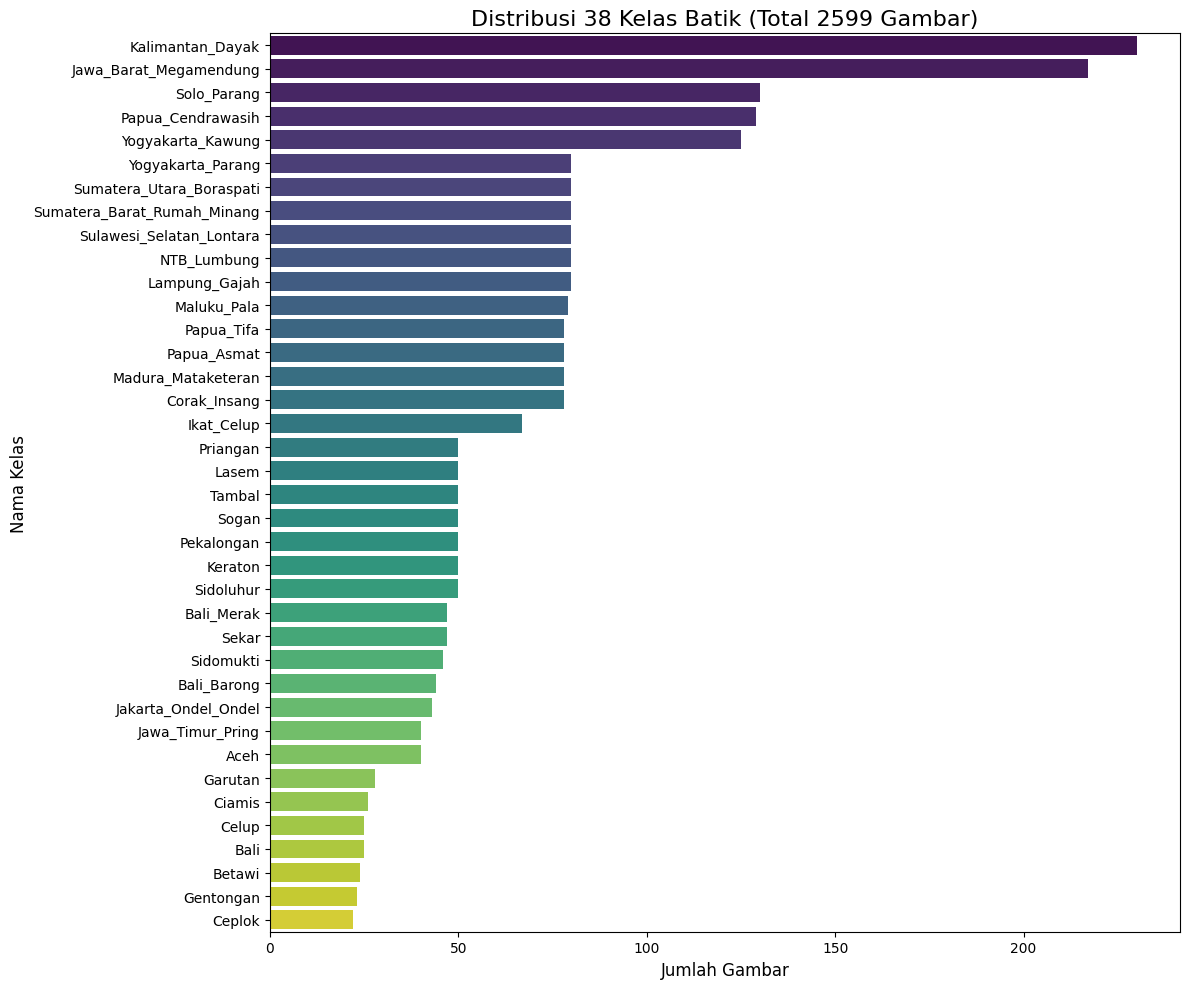

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, UnidentifiedImageError
import random
from pathlib import Path

# --- Konfigurasi: cari folder data secara otomatis jika memungkinkan ---
# Nama-nama folder yang mungkin dibuat oleh skrip download atau struktur Anda
POSSIBLE_NAMES = ["Batik_Indonesia_JPG", "Batik-Indonesia", "Batik_Indonesia", "data", "dataset"]

# Cek beberapa lokasi relatif (notebook biasanya berada di src/)
search_roots = [Path.cwd(), Path.cwd().parent]
candidates = []
for root in search_roots:
    for name in POSSIBLE_NAMES:
        p = root / name
        if p.exists() and p.is_dir():
            candidates.append(p)

# Jika belum ketemu, coba cari folder yang mengandung 'Batik' di parent
if not candidates:
    for d in Path.cwd().parent.glob("*Batik*"):
        if d.is_dir():
            candidates.append(d)

if candidates:
    DATA_DIR = str(candidates[0])
    print(f"DATA_DIR auto-detected: {DATA_DIR}")
else:
    raise FileNotFoundError(
        "Tidak menemukan folder data. Coba: 1) jalankan download_script.py agar menghasilkan 'Batik_Indonesia_JPG', "
        "atau 2) set DATA_DIR manual ke path folder gambar. Dicari di: " + ", ".join(str(p) for p in search_roots)
    )

# --- 1. Memindai Data ---
print(f"Memindai folder data di: {DATA_DIR}")

class_counts = {}
total_files = 0

# Loop melalui setiap folder kelas di dalam DATA_DIR
for class_name in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_name)
    
    # Pastikan itu adalah folder
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        class_counts[class_name] = len(files)
        total_files += len(files)

print(f"Selesai. Ditemukan total {total_files} file dalam {len(class_counts)} kelas.")

# --- 2. Membuat DataFrame untuk Analisis ---
# Mengubah kamus menjadi DataFrame Pandas agar mudah dianalisis
df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['count'])
df = df.sort_values(by='count', ascending=False)

# --- 3. Menampilkan Statistik Dasar ---
print("\n--- Statistik Distribusi Kelas ---")
print(df.describe())

# --- 4. Visualisasi Distribusi Kelas ---
print("\nMembuat plot distribusi kelas...")

plt.figure(figsize=(12, 10)) # Ukuran plot
sns.barplot(x=df['count'], y=df.index, palette='viridis')
plt.title(f'Distribusi {len(class_counts)} Kelas Batik (Total {total_files} Gambar)', fontsize=16)
plt.xlabel('Jumlah Gambar', fontsize=12)
plt.ylabel('Nama Kelas', fontsize=12)
plt.tight_layout() # Merapikan plot
plt.show()